In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")  #it gives us better visuals

In [2]:
df = pd.read_csv("../data/sales_data.csv")

In [3]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
df.columns = df.columns.str.strip().str.replace(" ", "_")               #if you stored as "sales data" it will converted into "sales_data" by this code
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub-Category',
       'Product_Name', 'Sales'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.replace("-", "_")                 #same as above "sales-date" will converted into "sales_data"

In [ ]:
df.dtypes

Row_ID             int64
Order_ID          object
Order_Date        object
Ship_Date         object
Ship_Mode         object
Customer_ID       object
Customer_Name     object
Segment           object
Country           object
City              object
State             object
Postal_Code      float64
Region            object
Product_ID        object
Category          object
Sub_Category      object
Product_Name      object
Sales            float64
dtype: object

In [ ]:
total_sales = df['Sales'].sum()             #This will generate How much revenue did we generate?
total_sales

np.float64(2261536.7827000003)

In [11]:
total_orders = df['Order_ID'].nunique()   #How many orders were placed?
total_orders


4922

In [12]:
avg_order_value = total_sales / total_orders  #On average, how much does each order contribute?
avg_order_value


np.float64(459.4751691791955)

In [14]:
print(f"Total Sales: ${total_sales:,.2f}")                     
print(f"Total Orders: {total_orders}")
print(f"Average Order Value: ${avg_order_value:,.2f}")

#calculated core KPIs like total sales, total orders, and average order value to give a high-level overview of business performance

Total Sales: $2,261,536.78
Total Orders: 4922
Average Order Value: $459.48


In [19]:
# Force convert Order_Date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

# Check result
df['Order_Date'].dtype
df['Order_Date']


0      2017-08-11
1      2017-08-11
2      2017-12-06
3      2016-11-10
4      2016-11-10
          ...    
9795          NaT
9796   2016-12-01
9797   2016-12-01
9798   2016-12-01
9799   2016-12-01
Name: Order_Date, Length: 9800, dtype: datetime64[ns]

In [ ]:
df['Year_Month'] = df['Order_Date'].dt.to_period('M')    #only takes year and month
df['Year_Month']

0       2017-08
1       2017-08
2       2017-12
3       2016-11
4       2016-11
         ...   
9795        NaT
9796    2016-12
9797    2016-12
9798    2016-12
9799    2016-12
Name: Year_Month, Length: 9800, dtype: period[M]

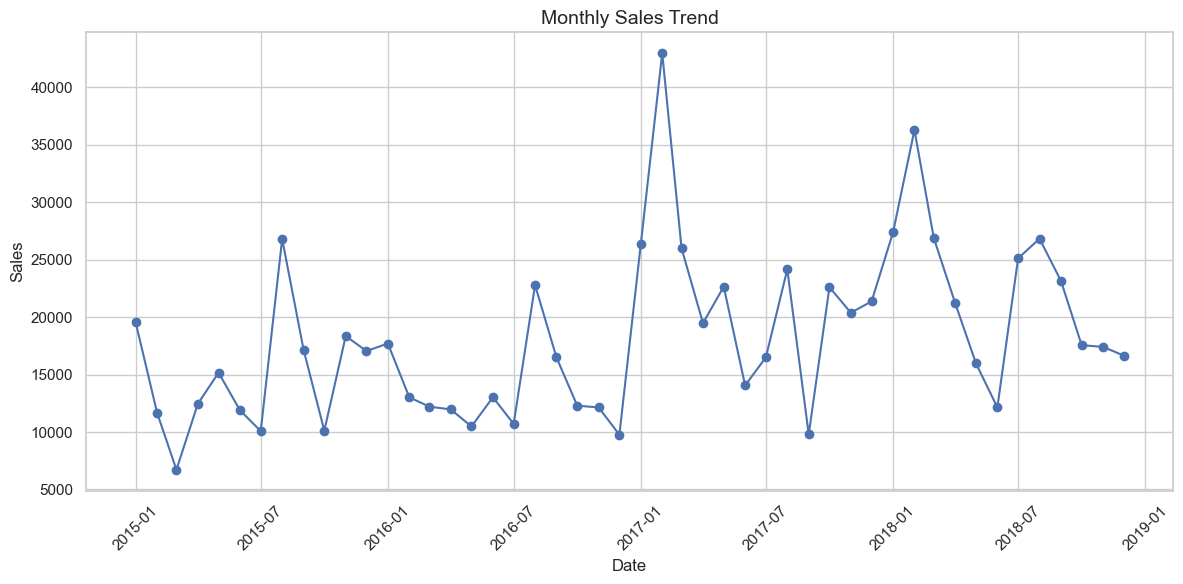

In [ ]:
monthly_sales = df.groupby('Year_Month')['Sales'].sum().reset_index()
#Breakdown:   df.groupby('Year_Month')→ groups all rows that belong to the same month
#['Sales'].sum()→ calculates total sales for each month
#.reset_index()→ converts the grouped index into a normal column
monthly_sales['Year_Month'] = monthly_sales['Year_Month'].dt.to_timestamp()
#converts by timestamp

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year_Month'], monthly_sales['Sales'], marker='o')

plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [21]:
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
region_sales


,Region,Sales
0,Central,492646.9132
1,East,669518.7260
2,South,389151.4590
3,West,710219.6845


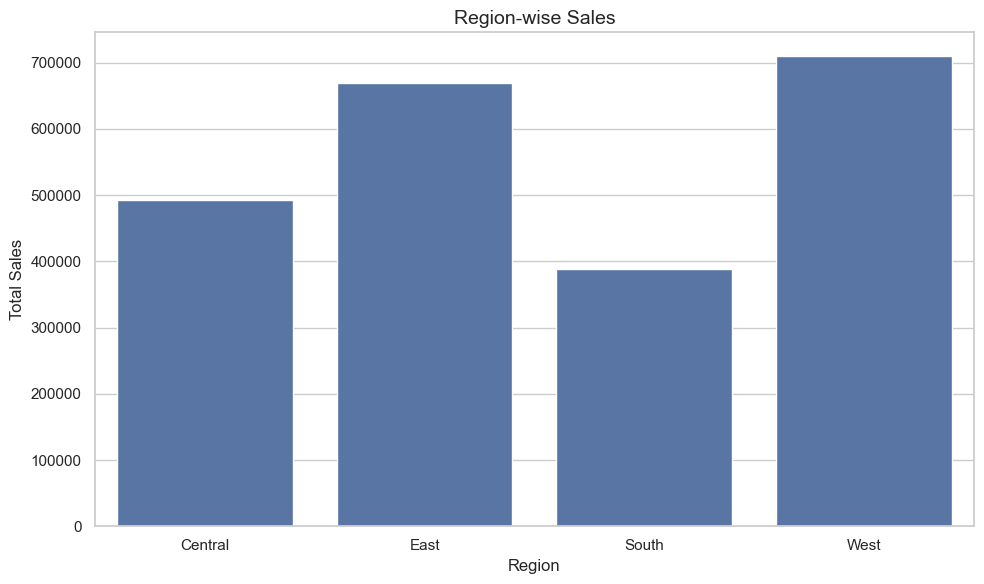

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=region_sales, x='Region', y='Sales')

plt.title("Region-wise Sales", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Total Sales")

plt.tight_layout()
plt.show()


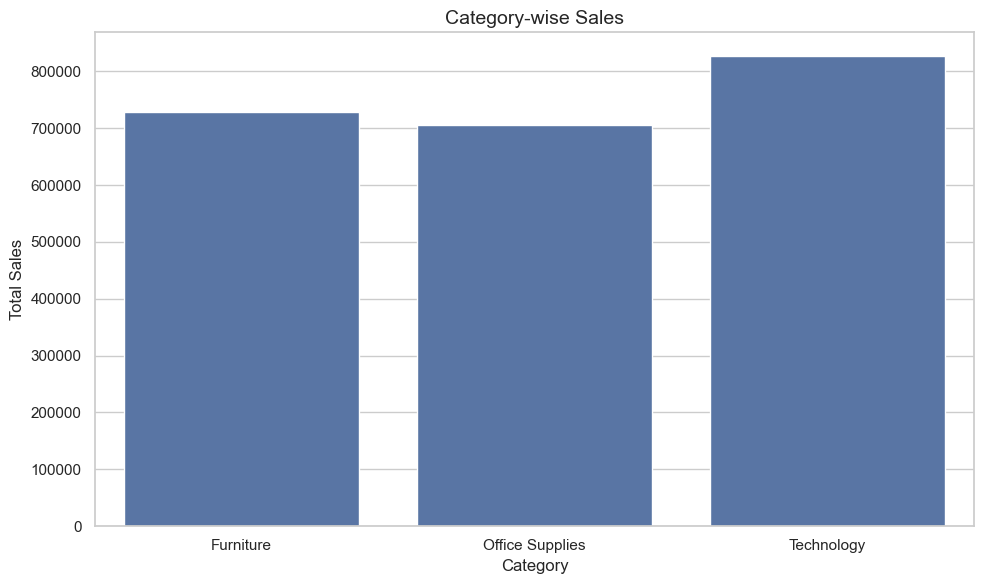

In [23]:
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x='Category', y='Sales')

plt.title("Category-wise Sales", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Total Sales")

plt.tight_layout()
plt.show()


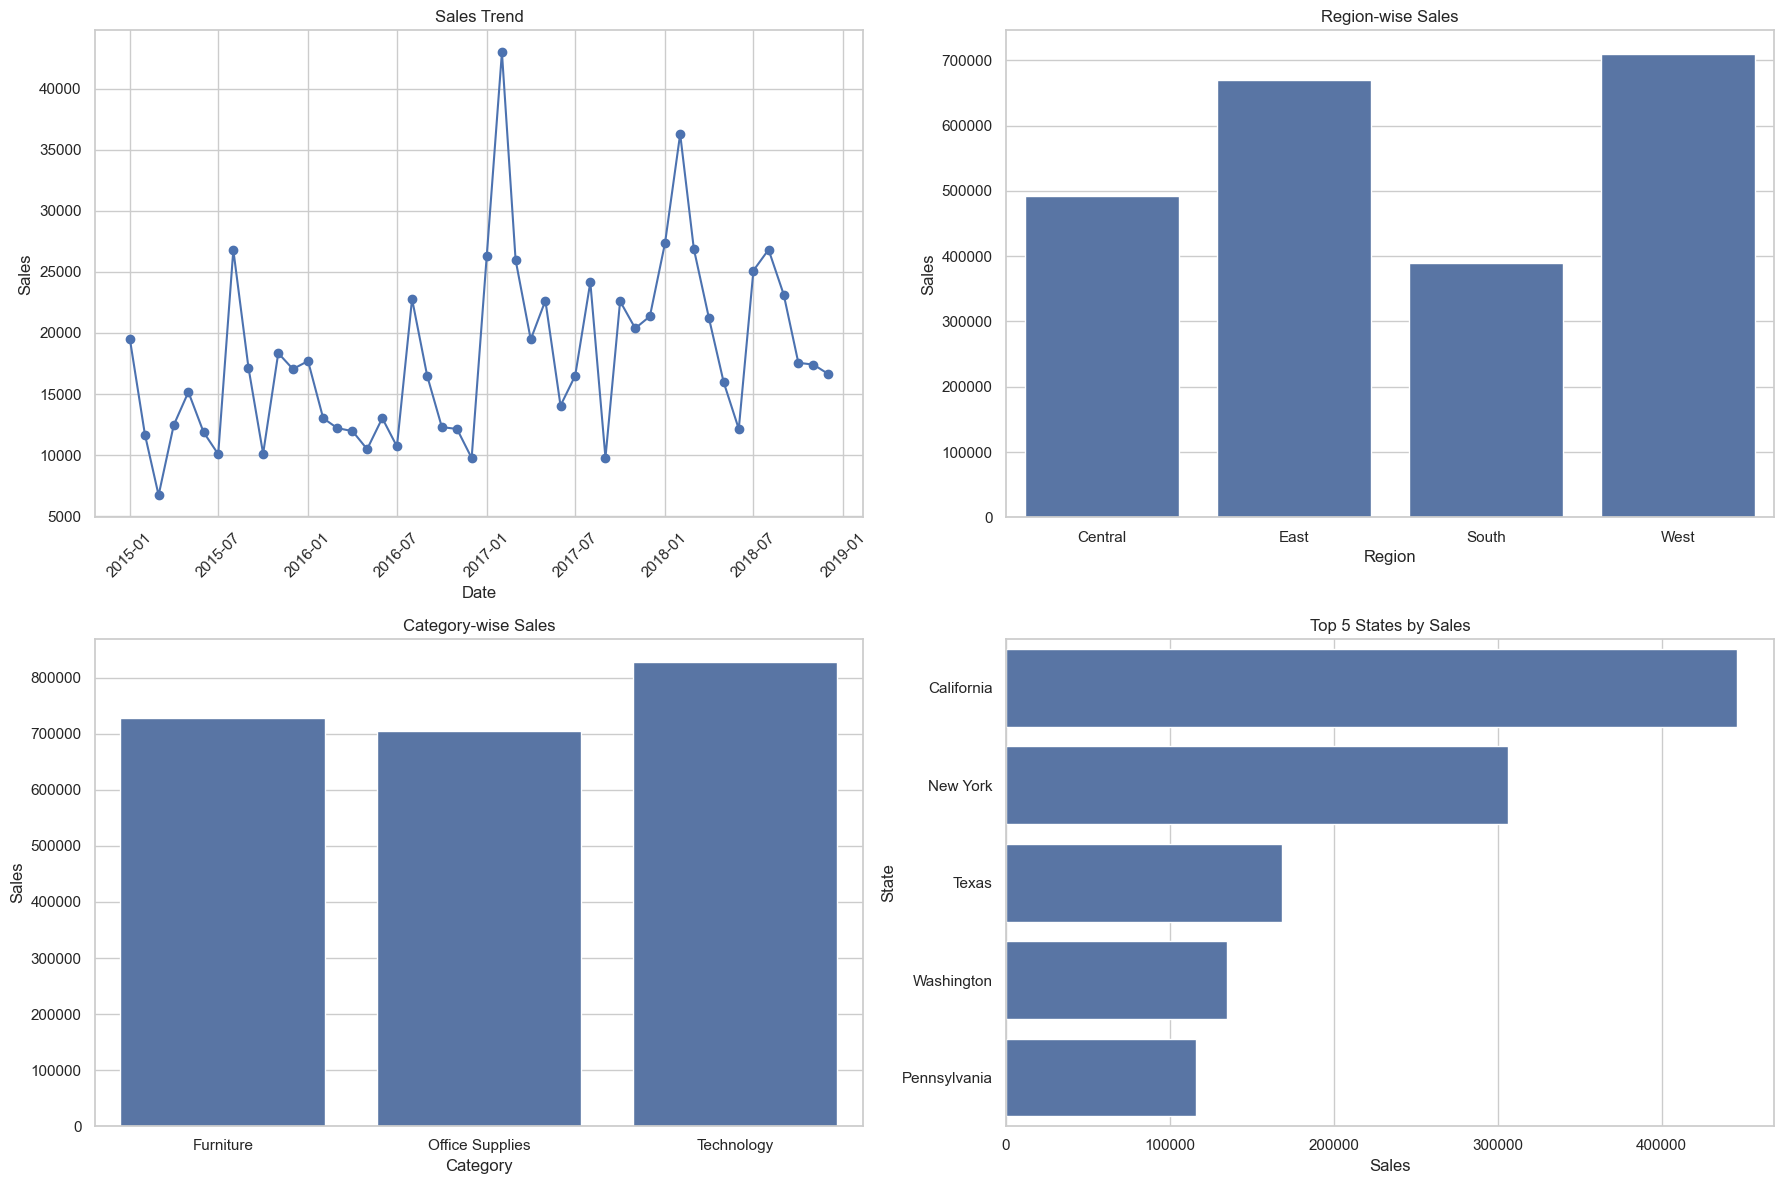

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(18, 12))  #Creates a 2×2 grid


# 1. Sales Trend (Top-Left)
axes[0, 0].plot(monthly_sales['Year_Month'], monthly_sales['Sales'], marker='o') #Are sales increasing, decreasing, or seasonal?
axes[0, 0].set_title("Sales Trend")
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Sales")
axes[0, 0].tick_params(axis='x', rotation=45)


# 2. Region-wise Sales (Top-Right)
sns.barplot(                                        #Which region contributes most to revenue?
    data=region_sales,
    x='Region',
    y='Sales',
    ax=axes[0, 1]
)
axes[0, 1].set_title("Region-wise Sales")
axes[0, 1].set_xlabel("Region")
axes[0, 1].set_ylabel("Sales")


# 3. Category-wise Sales (Bottom-Left)
sns.barplot(                                               #Which product category drives sales?
    data=category_sales,
    x='Category',
    y='Sales',
    ax=axes[1, 0]
)
axes[1, 0].set_title("Category-wise Sales")
axes[1, 0].set_xlabel("Category")
axes[1, 0].set_ylabel("Sales")

# 4. Top 5 States by Sales (Bottom-Right)
state_sales = (
    df.groupby('State')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

sns.barplot(
    data=state_sales,
    x='Sales',
    y='State',
    ax=axes[1, 1]
)
axes[1, 1].set_title("Top 5 States by Sales")
axes[1, 1].set_xlabel("Sales")
axes[1, 1].set_ylabel("State")


# Final layout adjustment
plt.tight_layout()
plt.show()
